In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set()

In [2]:
df = pd.read_excel("../data/saeb-2015.xlsx")

In [11]:
df.head()

,ID_PROVA_BRASIL,Região,UF,Dependência Administrativa,SERIE,Código do aluno na ANEB/Prova Brasil,"Proficiência em Língua Portuguesa transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)","Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)",Qual é o seu sexo?,Como você se considera?,...,Atualmente você trabalha fora de casa?,Quando você entrou na escola?,"A partir da primeira série ou primeiro ano, em que tipo de escola você estudou?",Você já foi reprovado?,Você já abandonou a escola durante o período de aulas e ficou fora da escola o resto do ano?,Você faz o dever de casa de Língua Portuguesa?,O(A) professor(a) corrige o dever de casa de Língua Portuguesa?,Você faz o dever de casa de Matemática?,O(A) professor(a) corrige o dever de casa de Matemática?,Você utiliza a biblioteca ou sala de leitura da sua escola?
0,2015,Nordeste,CE,Municipal,5,17324219,188.534129,189.393921,Masculino,Pardo(a).,...,Não.,Na creche (0 a 3 anos).,Somente em escola pública.,Não.,Não.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,De vez em quando.
1,2015,Nordeste,CE,Municipal,5,17324220,201.948481,233.890027,Masculino,Branco(a).,...,Não.,Na creche (0 a 3 anos).,Somente em escola pública.,Não.,Não.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,De vez em quando.
2,2015,Nordeste,CE,Municipal,5,17324223,250.581321,274.296826,Feminino.,Amarelo(a).,...,Não.,Na pré-escola (4 a 5 anos).,Somente em escola pública.,"Sim, uma vez.",Não.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,De vez em quando.
3,2015,Nordeste,CE,Municipal,5,17324224,248.970776,277.062938,Masculino,Pardo(a).,...,Não.,Na pré-escola (4 a 5 anos).,Somente em escola pública.,Não.,Não.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.
4,2015,Nordeste,CE,Municipal,5,17324225,287.952030,259.769069,Feminino.,Amarelo(a).,...,Não.,Na pré-escola (4 a 5 anos).,Somente em escola pública.,Não.,Não.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,Sempre ou quase sempre.,De vez em quando.


In [ ]:
df.shape

In [ ]:
df['O(A) professor(a) corrige o dever de casa de Língua Portuguesa?'].value_counts()

In [ ]:
df['O(A) professor(a) corrige o dever de casa de Língua Portuguesa?'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.groupby('O(A) professor(a) corrige o dever de casa de Língua Portuguesa?')['Você faz o dever de casa de Língua Portuguesa?'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['Qual a sua idade?'].hist()
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.hist(df['Qual a sua idade?'], bins=8, orientation='vertical')
ax.ticklabel_format(style='plain')

In [ ]:
df['percent'] = df['Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'] / df['Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'].sum()

In [ ]:
plt.pie(df['percent'], labels=df['Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'])
plt.show()

In [ ]:
plt.hist(df['Dependência Administrativa'])

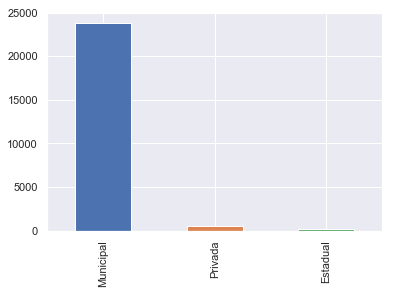

In [3]:
df['Dependência Administrativa'].value_counts().plot(kind='bar')
plt.show()

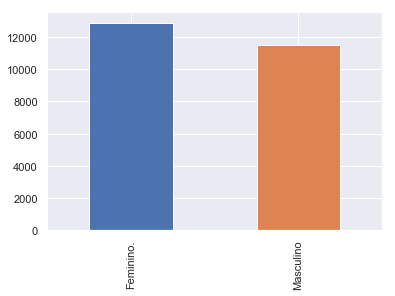

In [4]:
df['Qual é o seu sexo?'].value_counts().plot(kind='bar')
plt.show()

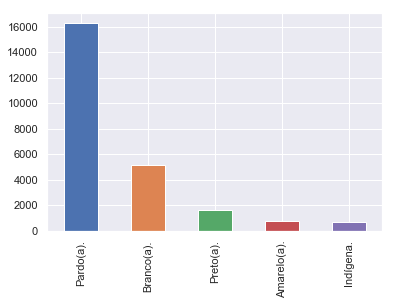

In [5]:
df['Como você se considera?'].value_counts().plot(kind='bar')
plt.show()

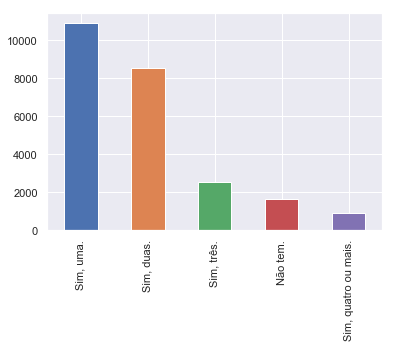

In [6]:
df['Na sua casa tem televisão em cores?'].value_counts().plot(kind='bar')
plt.show()

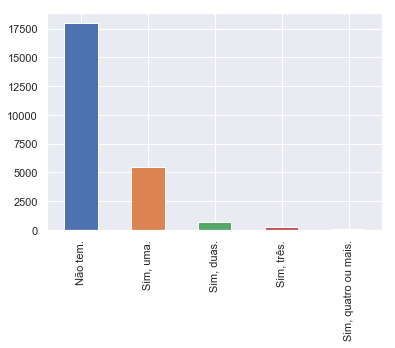

In [13]:
df['Tem carro em casa?'].value_counts().plot(kind='bar')
plt.show()

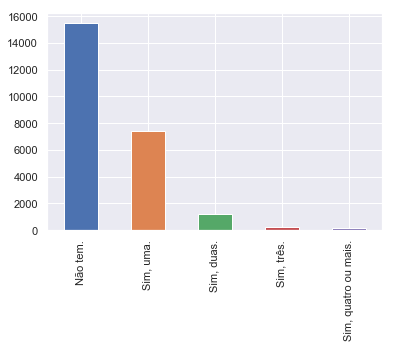

In [17]:
df['Tem computador em casa?'].value_counts().plot(kind='bar')
plt.show()

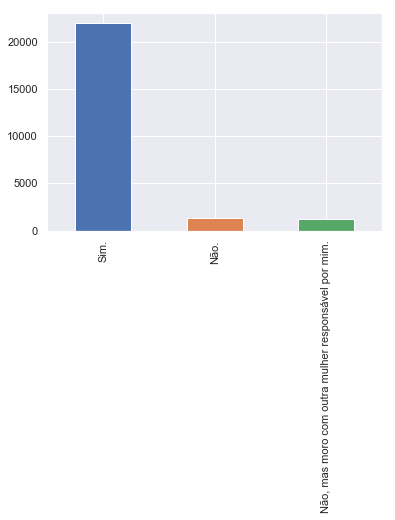

In [18]:
df['mora com sua mãe?'].value_counts().plot(kind='bar')
plt.show()

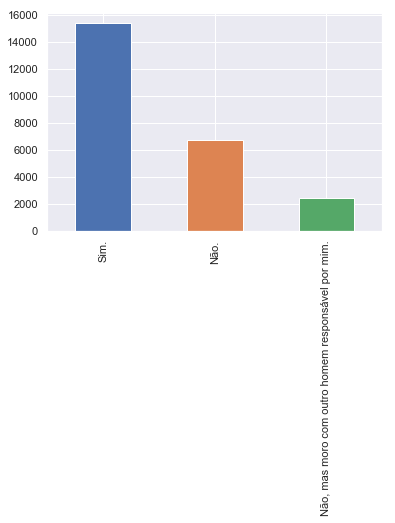

In [19]:
df['Você mora com seu pai?'].value_counts().plot(kind='bar')
plt.show()

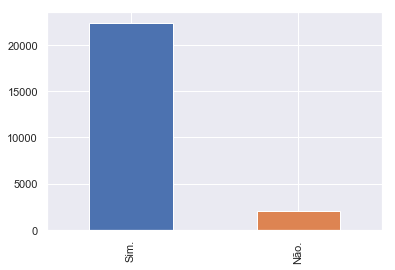

In [20]:
df['Sua mãe, ou a mulher responsável por você, sabe ler e escrever?'].value_counts().plot(kind='bar')
plt.show()

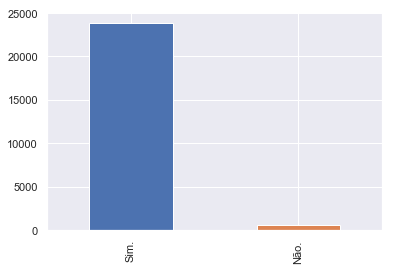

In [21]:
df['Seus pais ou responsáveis incentivam você a estudar?'].value_counts().plot(kind='bar')
plt.show()

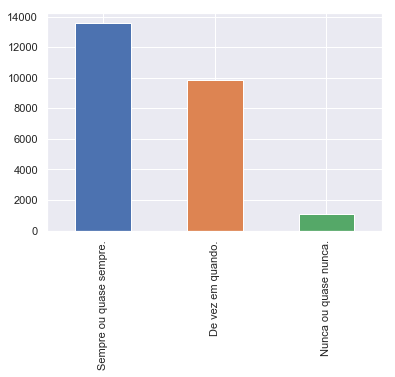

In [22]:
df['Com qual frequência você lê: Livros.'].value_counts().plot(kind='bar')
plt.show()

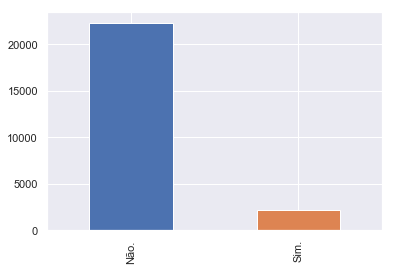

In [23]:
df['Atualmente você trabalha fora de casa?'].value_counts().plot(kind='bar')
plt.show()

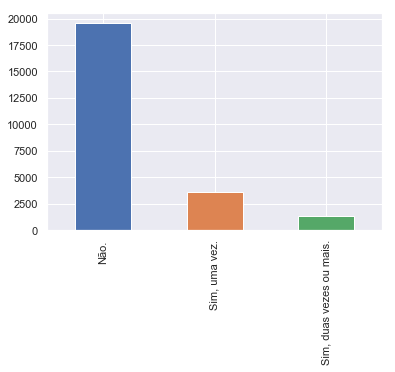

In [24]:
df['Você já foi reprovado?'].value_counts().plot(kind='bar')
plt.show()

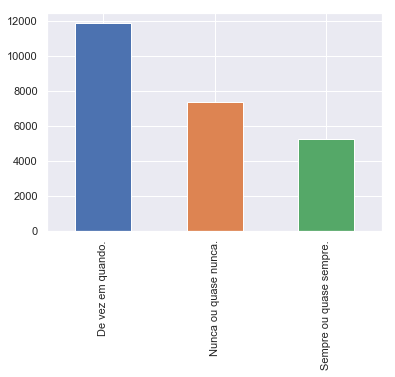

In [25]:
df['Com qual frequência você costuma ir à/ao: Biblioteca.'].value_counts().plot(kind='bar')
plt.show()

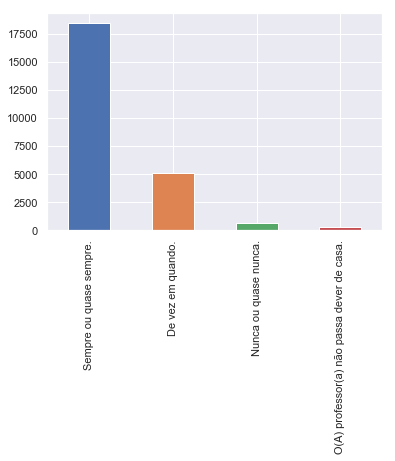

In [26]:
df['Você faz o dever de casa de Língua Portuguesa?'].value_counts().plot(kind='bar')
plt.show()

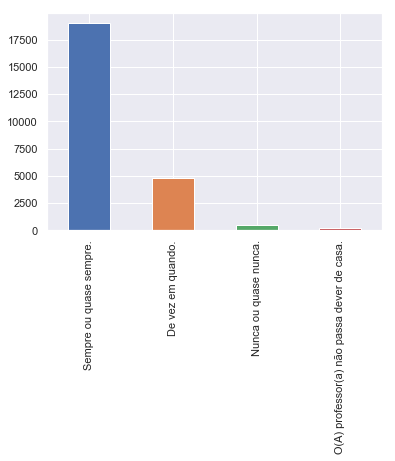

In [27]:
df['Você faz o dever de casa de Matemática?'].value_counts().plot(kind='bar')
plt.show()

In [29]:
df['Proficiência em Língua Portuguesa transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'].median()

225.430925

In [30]:
df['Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'].median()

228.577294

In [31]:
df['Qual a sua idade?'].median()

11.0

In [32]:
df['Tem geladeira em casa'].median()

KeyError: 'Tem geladeira em casa'

In [34]:
df['Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)']

0        189.393921
1        233.890027
2        274.296826
3        277.062938
4        259.769069
5        198.881867
6        214.067813
7        156.373013
8        251.495831
9        271.689897
10       248.364743
11       275.075518
12       156.174484
13       223.692975
14       247.091124
15       186.117457
16       276.608533
17       170.393771
18       207.958726
19       177.007063
20       141.048175
21       244.445461
22       193.810756
23       171.309232
24       161.217648
25       247.154003
26       183.625498
27       292.195283
28       205.329383
29       191.481108
            ...    
24449    232.283514
24450    188.420780
24451    195.934330
24452    158.656383
24453    206.350312
24454    277.835593
24455    170.160756
24456    250.337406
24457    151.319676
24458    180.355740
24459    139.638571
24460    194.395502
24461    177.886417
24462    321.245152
24463    245.109182
24464    191.768451
24465    336.216918
24466    302.140596
24467    151.345554


In [37]:
df['Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'].describe()

count    24479.000000
mean       232.260271
std         48.168045
min        120.993785
25%        196.949893
50%        228.577294
75%        264.698437
max        366.452656
Name: Proficiência do aluno em Matemática transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97), dtype: float64

In [38]:
df['Proficiência em Língua Portuguesa transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97)'].describe()

count    24479.000000
mean       223.685853
std         47.462237
min         88.730629
25%        189.988483
50%        225.430925
75%        257.160845
max        337.290891
Name: Proficiência em Língua Portuguesa transformada na escala única do SAEB, com média = 250, desvio = 50 (do SAEB/97), dtype: float64

In [39]:
df['Qual a sua idade?'].describe()

count    24479.000000
mean        10.824135
std          1.005335
min          8.000000
25%         10.000000
50%         11.000000
75%         11.000000
max         15.000000
Name: Qual a sua idade?, dtype: float64